In [9]:
%load_ext autoreload
%autoreload 2
from autoseg.datasets import GunpowderZarrDataset
from autoseg.config import read_config
from torch.utils.data import DataLoader
from autoseg.datasets.utils import multisample_collate as collate
from autoseg.train_utils import get_2D_snapshot
from autoseg.models import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import random
random.seed(1000)

In [3]:
def dataloader_from_config(dataset, config):
    if config["parallel"]:
        return DataLoader(
            dataset=dataset,
            collate_fn=collate,
            batch_size=config["batch_size"],
            num_workers=config["num_workers"],
            prefetch_factor=config["precache_per_worker"],
            pin_memory=True,
        )
    else:
        return DataLoader(
            dataset=dataset,
            collate_fn=collate,
            batch_size=config["batch_size"],
            pin_memory=True,
        )

In [4]:
def get_image_for_scale(scale="s0"):
  config = read_config("autoseg/user_configs/experiments/resolution_experiments/" + scale)
  dataset = GunpowderZarrDataset(
    config=config["pipeline"],
    input_image_shape=config["training"]["train_dataloader"]["input_image_shape"],
    output_image_shape=config["training"]["train_dataloader"]["output_image_shape"],
  )
  it = iter(dataset)
  sample = next(it)
  outputs = {name: val for name, val in zip(config["training"]["batch_outputs"], sample)}
  o = {}
  for key in ["raw"]:
    o[key] = outputs[key]
  images = get_2D_snapshot(o)
  return images[0]

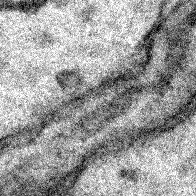

In [5]:
get_image_for_scale("s0")

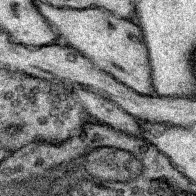

In [6]:
get_image_for_scale("s1")

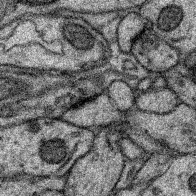

In [7]:
get_image_for_scale("s2")

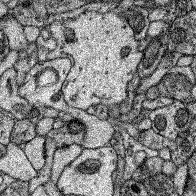

In [8]:
get_image_for_scale("s3")

In [27]:
config = read_config("autoseg/user_configs/anton/resolution_experiments/default")

In [28]:
config

{'model': {'class': 'UNETR',
  'hf_path': None,
  'hyperparameters': {'in_channels': 1, 'output_shapes': [3, 10]},
  'name': 'UNETR',
  'path': 'checkpoints/UNETR/'},
 'pipeline': {'_order': ['source',
   'normalize',
   'augment',
   'target',
   'post',
   'lsd_target'],
  '_outputs': ['RAW',
   'LABELS',
   'GT_AFFS',
   'AFFS_WEIGHTS',
   'GT_AFFS_MASK',
   'LABELS_MASK',
   'GT_LSDS',
   'LSDS_WEIGHTS'],
  'augment': [{'elastic_augment': {'control_point_spacing': [1, 50, 50],
     'jitter_sigma': [0, 5, 5],
     'rotation_interval': [0, 1.570796],
     'scale_interval': [0.9, 1.1],
     'subsample': 4}},
   {'simple_augment': {'transpose_only': [1, 2]}},
   {'noise_augment': {'array': 'RAW'}},
   {'intensity_augment': {'array': 'RAW',
     'scale_max': 1.1,
     'scale_min': 0.9,
     'shift_max': 0.1,
     'shift_min': -0.1}},
   {'smooth_array': {'array': 'RAW'}},
   {'grow_boundary': {'labels': 'LABELS', 'only_xy': True}}],
  'lsd_target': [{'add_local_shape_descriptor': {'desc

In [21]:
model = Model(config)

1 768 [48, 196, 196] 16


In [22]:
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{params:,}")

146,547,331


In [61]:
config = read_config("autoseg/user_configs/experiments/resolution_experiments/s2")

In [62]:
dataset = GunpowderZarrDataset(
    config=config["pipeline"],
    input_image_shape=config["training"]["train_dataloader"]["input_image_shape"],
    output_image_shape=config["training"]["train_dataloader"]["output_image_shape"],
)

In [63]:
it = iter(dataset)

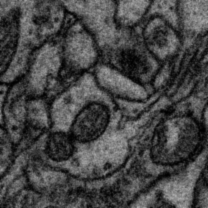

In [64]:
sample = next(it)
outputs = {name: val for name, val in zip(config["training"]["batch_outputs"], sample)}
o = {}
for key in ["raw"]:
  o[key] = outputs[key]
images = get_2D_snapshot(o)
images[0]

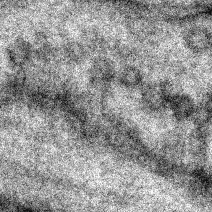

In [49]:
images[0]

In [12]:
def size_of_sample(sample):
  size = 0
  for arr in sample:
    size += arr.itemsize * arr.size
  size /= 1024**2
  print("Size of train data: {:.2f} MB".format(size))

In [11]:
80*8*2*12.5

16000.0

In [29]:
root_config = config
dataloader = DataLoader(
    dataset=dataset,
    collate_fn=collate,
    batch_size=1,
    #num_workers=80,
    #prefetch_factor=1,
    #pin_memory=True,
) 

In [21]:
dataset.pipeline

ZarrSource[/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip] -> Pad -> Pad -> Pad -> RandomLocation -> RandomProvider -> Normalize -> ElasticAugment -> SimpleAugment -> NoiseAugment -> IntensityAugment -> SmoothArray -> GrowBoundary -> AddAffinities -> BalanceLabels -> IntensityScaleShift -> Unsqueeze -> AddLocalShapeDescriptor -> PreCache

In [16]:
size_of_sample(next(iter(dataset)))

KeyboardInterrupt: 

In [15]:
size_of_sample(next(iter(dataloader)))

KeyboardInterrupt: 

In [23]:
import time
time.time()

1712374824.3981225

In [30]:
times = []
ctime = time.time()
for _, item in zip(range(30), dataloader):
  times.append(time.time() - ctime)
  ctime = time.time()

In [31]:
times

[12.127687215805054,
 0.6691429615020752,
 0.024767160415649414,
 0.09588837623596191,
 0.03594064712524414,
 0.03450131416320801,
 0.04183483123779297,
 0.11114883422851562,
 0.0303957462310791,
 0.03244757652282715,
 0.04220128059387207,
 0.027881860733032227,
 0.03441596031188965,
 0.14933562278747559,
 0.047514915466308594,
 0.0264284610748291,
 0.06777691841125488,
 0.024513721466064453,
 0.025088071823120117,
 0.060639381408691406,
 0.07320404052734375,
 0.05577683448791504,
 0.039203643798828125,
 0.04550790786743164,
 0.0243532657623291,
 0.023482799530029297,
 0.021941184997558594,
 0.03011322021484375,
 0.02900862693786621,
 0.032820701599121094]

In [32]:
sum(times)

14.084963083267212

In [ ]:
times

[22.771594285964966,
 0.6140687465667725,
 10.932597637176514,
 0.30176496505737305,
 12.360710620880127,
 0.014486312866210938,
 11.684767723083496,
 0.02010178565979004,
 12.251955032348633,
 1.0751118659973145]